In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, decomposition, feature_extraction, feature_selection, model_selection

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

In [3]:
#Define column names for the data present at above mentioned URL
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

In [4]:
# loading dataset into Pandas DataFrame
df = pd.read_csv(url, names=columns)

In [5]:
#Check dataframe header
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#Check shape of the dataframe
df.shape

(32561, 15)

In [7]:
# view summary of dataframe - statistical information only about numerical columns will be shown
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
#Calculate percentage of different-2 classes in the Pandas dataframe
from collections import Counter

dict = Counter(df['salary'])
print(f"dictionary with all classes : {dict}")
print(f"Keys for the different-2 classes : {dict.keys()}")
print(f"dict[' >50K'] : {dict[' >50K']} , dict[' <=50K'] : {dict[' <=50K']}")
print(f"Class 1 percentage : {dict[' >50K']/len(df)*100} , Class 2 percentage : {dict[' <=50K']/len(df)*100}")

dictionary with all classes : Counter({' <=50K': 24720, ' >50K': 7841})
Keys for the different-2 classes : dict_keys([' <=50K', ' >50K'])
dict[' >50K'] : 7841 , dict[' <=50K'] : 24720
Class 1 percentage : 24.080955744602438 , Class 2 percentage : 75.91904425539757


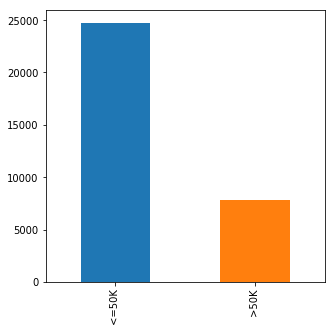

In [9]:
%matplotlib inline
#Visualize column salary of the dataframe
df['salary'].value_counts()

df['salary'].value_counts().plot(kind='bar',figsize=(5,5))

In [10]:
df['salary'] = df['salary'].map({' >50K': 1, ' <=50K': 0})

#### Preprocessing (Handling Missing/Duplicate/Categorical data)

In [11]:
#print information about missing data
print(f"Check count of the missing data in dataframe : {df.isna().any().count()}")

#handle missing data in the newly created dataframe if there is any
if df.isna().any().count() :
    df.fillna(value=-99999,axis=1,inplace=True)
    #print(f"\nheader of the new dataframe after handling of the missing data : \n{df1.head}")
    print("Info : Missing entries are updated in the dataframe")


#handle categorical data
df1 = pd.get_dummies(df)

#print information such as shape, duplicate entries in newly created dataframe
print(f"\nshape of the new dataframe before preprocessing : {df1.shape}")
print(f"Check count of the duplicated data in newly create dataframe : {df1.duplicated().sum()}")

#remove duplicates if there is any
if df1.duplicated().any().sum() :
    df1.drop_duplicates(inplace=True)
    print(f"\nshape of the new dataframe after removal of duplicate entries : {df1.shape}")

Check count of the missing data in dataframe : 15
Info : Missing entries are updated in the dataframe

shape of the new dataframe before preprocessing : (32561, 109)
Check count of the duplicated data in newly create dataframe : 24

shape of the new dataframe after removal of duplicate entries : (32537, 109)


In [12]:
#print(f"\ncheck statistical information about newly created dataframe after preprocessing : \n\n{df1.describe()}")

In [13]:
#Split dataframe into df_x and df_y
df_x = df1.drop(['salary'], 1)
df_y = df1['salary']

In [14]:
from sklearn.ensemble import RandomForestClassifier

#Use RandomForestRegressor to check feature_importances
rfc = RandomForestClassifier(random_state=10)
rfc.fit(df_x, df_y)

feature_importances = pd.DataFrame({'feature':df_x.columns,'importance':np.round(rfc.feature_importances_,4)})
feature_importances = feature_importances.sort_values('importance',ascending=False).set_index('feature')

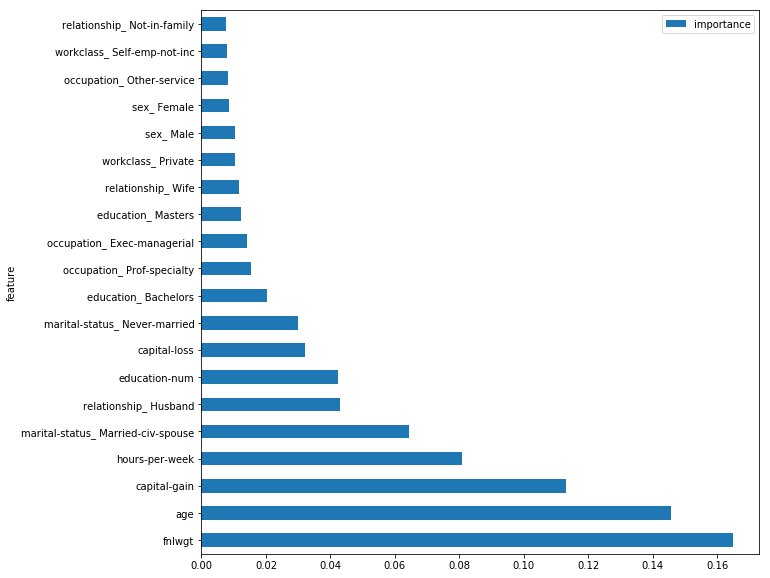

In [15]:
#Visualize top 20 features of the dataframe
feature_importances[:20].plot(kind='barh',figsize=(10,10))

#### Apply model on training and test dataset

In [17]:
from sklearn.cross_validation import train_test_split

x, x_test, y, y_test = train_test_split(df_x,df_y,test_size=1/3,train_size=2/3, random_state = 11)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.20,train_size =0.80, random_state = 11)

In [18]:
#Apply logistic regression model on the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr1 = LogisticRegression()
lr = RFE(lr1, 50)
lr.fit(x_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=50, step=1, verbose=0)

In [19]:
#Apply decision tree classifier model on the dataset
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier(min_samples_split=10, random_state=55, max_features=50)
d_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [20]:
# Apply Bagging classifier on the dataset
from sklearn.ensemble import BaggingClassifier

Boosting = BaggingClassifier(n_estimators=200)
Boosting.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [21]:
#Apply Random forest classifier on the dataset
rfc = RandomForestClassifier(random_state=55,max_features=50)
rfc.fit(df_x,df_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=55, verbose=0, warm_start=False)

#### Analyse model performances using mean squared error and accuracy score

In [26]:
models = pd.DataFrame(index=['train_mse','cv_mse','test_mse','accuracy_score'], columns=['logistic_regression','decision_tree','random_forest','xgboost'])

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score

In [28]:
models.loc['train_mse','logistic_regression'] = mean_squared_error(y_pred=lr.predict(x_train), y_true=y_train)
models.loc['cv_mse','logistic_regression'] = mean_squared_error(y_pred=lr.predict(x_cv), y_true=y_cv)
models.loc['test_mse','logistic_regression'] = mean_squared_error(y_pred=lr.predict(x_test), y_true=y_test)
models.loc['accuracy_score','logistic_regression'] = accuracy_score(y_pred=lr.predict(x_test).round(), y_true=y_test)

models.loc['train_mse','decision_tree'] = mean_squared_error(y_pred=d_tree.predict(x_train), y_true=y_train)
models.loc['cv_mse','decision_tree'] = mean_squared_error(y_pred=d_tree.predict(x_cv), y_true=y_cv)
models.loc['test_mse','decision_tree'] = mean_squared_error(y_pred=d_tree.predict(x_test), y_true=y_test)
models.loc['accuracy_score','decision_tree'] = accuracy_score(y_pred=d_tree.predict(x_test).round(), y_true=y_test)

models.loc['train_mse','random_forest'] = mean_squared_error(y_pred=rfc.predict(x_train), y_true=y_train)
models.loc['cv_mse','random_forest'] = mean_squared_error(y_pred=rfc.predict(x_cv), y_true=y_cv)
models.loc['test_mse','random_forest'] = mean_squared_error(y_pred=rfc.predict(x_test), y_true=y_test)
models.loc['accuracy_score','random_forest'] = accuracy_score(y_pred=rfc.predict(x_test).round(), y_true=y_test)

models.loc['train_mse','xgboost'] = mean_squared_error(y_pred=Boosting.predict(x_train), y_true=y_train)
models.loc['cv_mse','xgboost'] = mean_squared_error(y_pred=Boosting.predict(x_cv), y_true=y_cv)
models.loc['test_mse','xgboost'] = mean_squared_error(y_pred=Boosting.predict(x_test), y_true=y_test)
models.loc['accuracy_score','xgboost'] = accuracy_score(y_pred=Boosting.predict(x_test).round(), y_true=y_test)

In [29]:
models

,logistic_regression,decision_tree,random_forest,xgboost
train_mse,0.170413,0.064373,0.0123329,5.76302e-05
cv_mse,0.16732,0.175386,0.0133671,0.150035
test_mse,0.171953,0.172229,0.0120782,0.148165
accuracy_score,0.828047,0.827771,0.987922,0.851835


#### Conclusion : It is clear by analyzing the MSE and Accuracy score that random forest is the best model to do the prediction using the census bureau database.